# IMPORTS

In [3]:
%matplotlib inline
import math
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score as CVS
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report as c_r
from sklearn.metrics import confusion_matrix as c_m
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC as LSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV as GSCV
#from google.colab import files
#import io
#from xgboost import XGBClassifier as XGB

# LOAD DATA 
hit lists from each decade from 1960 - 2010

In [2]:
# Google colab data import part 1
# uploaded = files.upload()


Saving dataset-of-80s.csv to dataset-of-80s.csv
Saving dataset-of-70s.csv to dataset-of-70s.csv
Saving dataset-of-60s.csv to dataset-of-60s.csv
Saving dataset-of-90s.csv to dataset-of-90s.csv
Saving dataset-of-10s.csv to dataset-of-10s.csv
Saving dataset-of-00s.csv to dataset-of-00s.csv


In [3]:
# Google colab data import part 2
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

User uploaded file "dataset-of-80s.csv" with length 1074818 bytes
User uploaded file "dataset-of-70s.csv" with length 1219776 bytes
User uploaded file "dataset-of-60s.csv" with length 1368443 bytes
User uploaded file "dataset-of-90s.csv" with length 856926 bytes
User uploaded file "dataset-of-10s.csv" with length 987053 bytes
User uploaded file "dataset-of-00s.csv" with length 909258 bytes


In [4]:
# Google colab data import part 3
#hl60 = pd.read_csv(io.StringIO(uploaded['dataset-of-60s.csv'].decode('utf-8')))
#hl70 = pd.read_csv(io.StringIO(uploaded['dataset-of-70s.csv'].decode('utf-8')))
#hl80 = pd.read_csv(io.StringIO(uploaded['dataset-of-80s.csv'].decode('utf-8')))
#hl90 = pd.read_csv(io.StringIO(uploaded['dataset-of-90s.csv'].decode('utf-8')))
#hl00 = pd.read_csv(io.StringIO(uploaded['dataset-of-00s.csv'].decode('utf-8')))
#hl10 = pd.read_csv(io.StringIO(uploaded['dataset-of-10s.csv'].decode('utf-8')))

In [4]:
# Jupyter Notebook local data import

hl60 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-60s.csv")
hl70 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-70s.csv")
hl80 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-80s.csv")
hl90 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-90s.csv")
hl00 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-00s.csv")
hl10 = pd.read_csv("C:/Users/Juss/Downloads/dataset-of-10s.csv")

In [ ]:
#print(hl60.info())
#print(hl70.info())
#print(hl80.info())
#print(hl90.info())
#print(hl00.info())
#print(hl10.info())

# DATA EXPLORATION/CLEANING

### Putting the data into one datadrame

In [5]:
allhl = pd.concat([hl60,hl70,hl80,hl90,hl00,hl10], ignore_index=True)

In [6]:
allhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

## Dropping unnecessary columns
-Track name isn't important when considering if people are going to like it.
-Who the artist is doesn't determine if a track will be a hit or not. 
-URI the spotify identifier surely can't predict a hit song.
-Chorus_hit is the authors best guess at when a chorus begins. Subject to extreme bias.
-Sections should be correlated with duration. The more sections a song has the longer the duration of said song. 
-Speechiness has a correlation with instrumentalness. As one rises the other falls.
-Liveness is a measure how whether a crowd could be detected within the track. Liveness should play no role in whether a track is a hit or not. In addition any song that adds crowd noise or applause in post production will trigger a false reading. 
-Energy had high correlations of .77 and -.71 with loudness and acousticness respectively. 

In [7]:
allhl.drop(columns=['track','artist','uri','chorus_hit','sections','speechiness', 'liveness', 'energy'], inplace=True)

In [8]:
allhl.shape

(41106, 11)

## Observing the features more closely

'Key' has a higher range of values... worth exploring further.
'Mode' appears to only have two values. 
'Time_signature' values appear to be whole numbers... explore further.



In [9]:
allhl.describe()

,danceability,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000
mean,0.539695,5.213594,-10.221525,0.693354,0.364197,0.154416,0.542440,119.338249,2.348776e+05,3.893689,0.500000
std,0.177821,3.534977,5.311626,0.461107,0.338913,0.303530,0.267329,29.098845,1.189674e+05,0.423073,0.500006
min,0.000000,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.000000,1.516800e+04,0.000000,0.000000
25%,0.420000,2.000000,-12.816000,0.000000,0.039400,0.000000,0.330000,97.397000,1.729278e+05,4.000000,0.000000
50%,0.552000,5.000000,-9.257000,1.000000,0.258000,0.000120,0.558000,117.565000,2.179070e+05,4.000000,0.500000
75%,0.669000,8.000000,-6.374250,1.000000,0.676000,0.061250,0.768000,136.494000,2.667730e+05,4.000000,1.000000
max,0.988000,11.000000,3.744000,1.000000,0.996000,1.000000,0.996000,241.423000,4.170227e+06,5.000000,1.000000


In [10]:
allhl.head(10)

,danceability,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,target
0,0.417,3,-7.727,1,0.4900,0.000000,0.845,185.655,173533,3,1
1,0.498,3,-12.475,1,0.0180,0.107000,0.797,101.801,213613,4,0
2,0.657,5,-13.392,1,0.8460,0.000004,0.908,115.940,223960,4,0
3,0.590,7,-12.058,0,0.7060,0.024600,0.967,105.592,157907,4,0
4,0.515,11,-3.515,0,0.8570,0.000872,0.906,114.617,245600,4,0
5,0.697,0,-10.573,1,0.7140,0.919000,0.778,112.117,167667,4,0
6,0.662,0,-18.883,1,0.3600,0.228000,0.591,143.507,134360,4,0
7,0.720,5,-9.086,0,0.7950,0.000000,0.887,119.999,160040,4,1
8,0.545,2,-15.079,0,0.5820,0.239000,0.386,118.223,158413,4,0
9,0.511,2,-7.637,1,0.0385,0.000002,0.685,128.336,157293,4,1


## Checking which features should be converted to dummie variables and/or outliers to drop. 
-time_signature is a measure of the number of beats per measure. As such it will be treated as a catecorgial variable and turned into dummies. The 0 will remain as significant as those are likely spoken-word tracks which can technically become "hits".
-mode indicidates whether a tracks modality is in major or minor. Will be converted into dummies. Although not entirely needed but the drop_first will allow for one fewer feature. 
-key is which key the track is in. As such the numerical values are associated with C,C/D,D,D/E,E and so on. As such will be turned into dummies. 

In [ ]:
allhl.time_signature.value_counts()

4    36297
3     3840
5      595
1      371
0        3
Name: time_signature, dtype: int64

In [ ]:
allhl['mode'].value_counts()

1    28501
0    12605
Name: mode, dtype: int64

In [ ]:
allhl['key'].value_counts()

0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: key, dtype: int64

Crosstabs of the catecorical variables shows us that hits exist within all the values. No value can be considered an outlier and all shall remain. 

In [ ]:
pd.crosstab(allhl['target'], allhl['time_signature'])

time_signature,0,1,3,4,5
target,,,,,
0,2,300,2650,17140,461
1,1,71,1190,19157,134


In [ ]:
pd.crosstab(allhl['target'], allhl['mode'])

mode,0,1
target,,
0,7057,13496
1,5548,15005


In [ ]:
pd.crosstab(allhl['target'], allhl['key'])

key,0,1,2,3,4,5,6,7,8,9,10,11
target,,,,,,,,,,,,
0,2565,1455,2502,764,1739,1940,1020,2534,1097,2341,1229,1367
1,2565,1823,2117,666,1584,1850,1197,2428,1248,2128,1499,1448


## Null Check

As expected, no nulls.

In [ ]:
allhl.isnull().sum()*100/allhl.isnull().count()

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
target              0.0
dtype: float64

In [ ]:
allhl.target.value_counts()

1    20553
0    20553
Name: target, dtype: int64

## Visualize features vs target

As danceability increaces the likeihood of being a hit increases. 

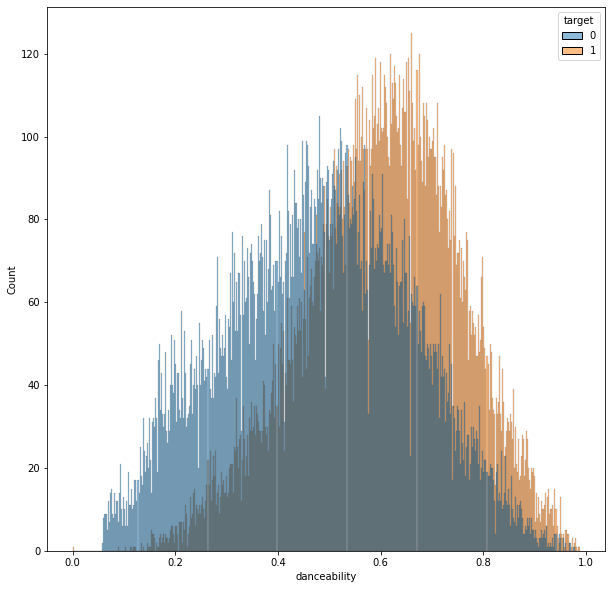

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='danceability',hue='target', bins=500)
plt.show()

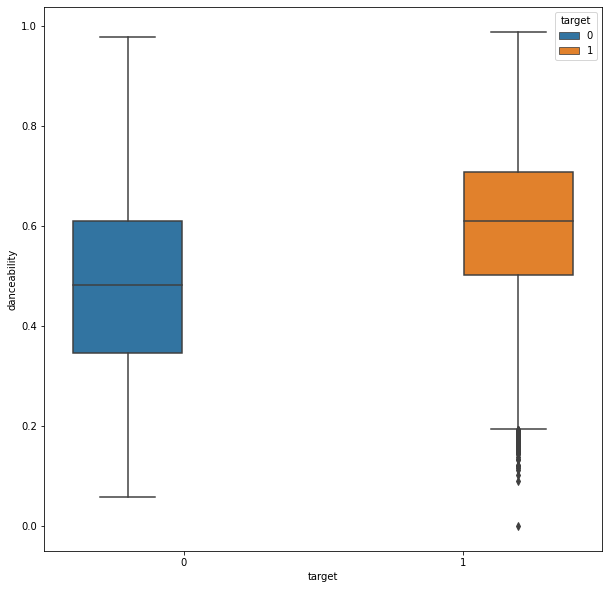

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='danceability', data=allhl, hue='target')
plt.show()

There's a window tight window for being a hit when related to loudness. Beyond a certain point the likelihood of being a hit is near nil. But a strong and rapid accent as songs just begin to get loud. Both hits and non-shits peak around the same level of loudness. 

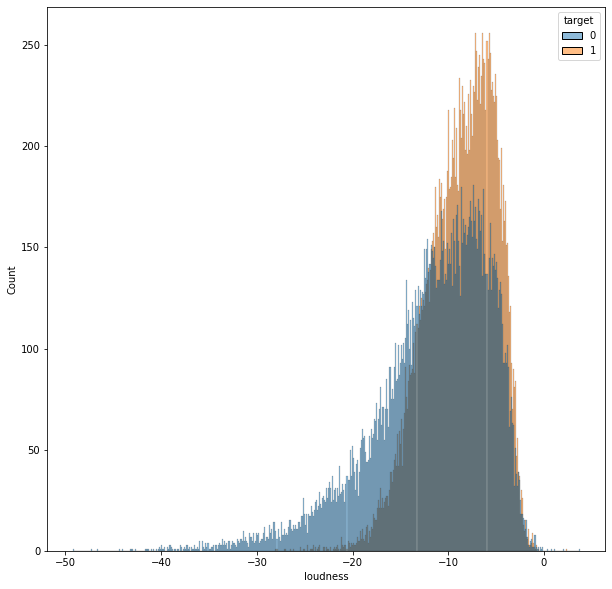

In [7]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='loudness',hue='target', bins=500)
plt.show()

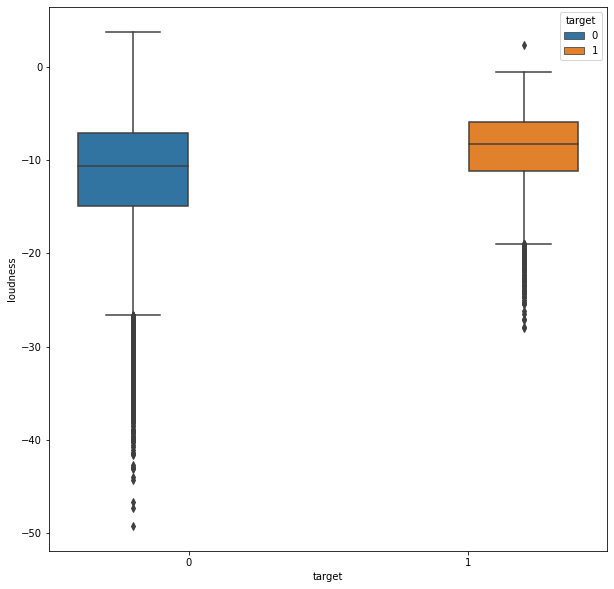

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='loudness', data=allhl, hue='target')
plt.show()

The lower the acousticness the more likely a track has a chance at being a hit. There is a steady decline from low levels to higher levels. 

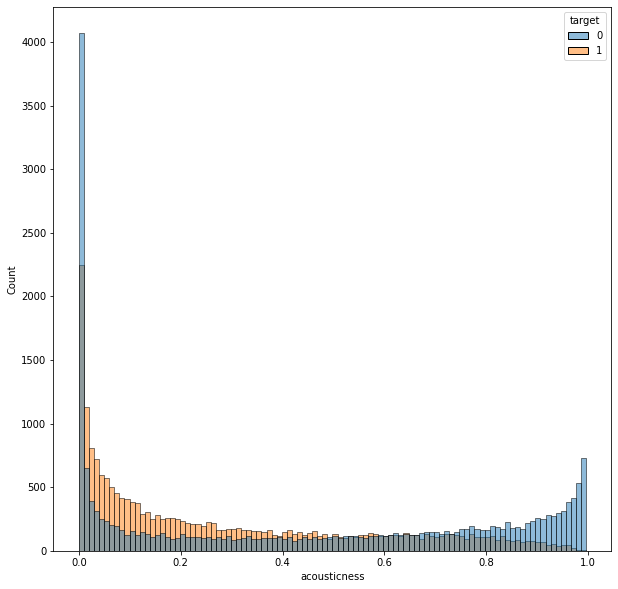

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='acousticness',hue='target', bins=100)
plt.show()

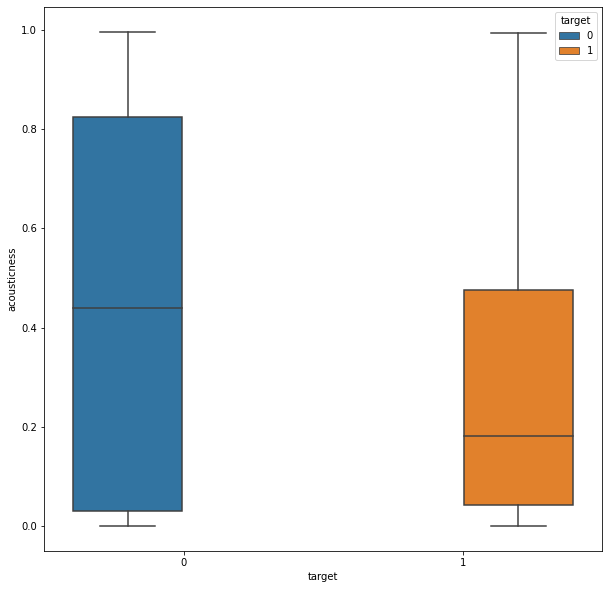

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='acousticness', data=allhl, hue='target')
plt.show()

As a song becomes more instrumental the likelihood of being a hit takes a serious "hit". Almost all the hits had high instances of spoken word, singing, or rapping. 

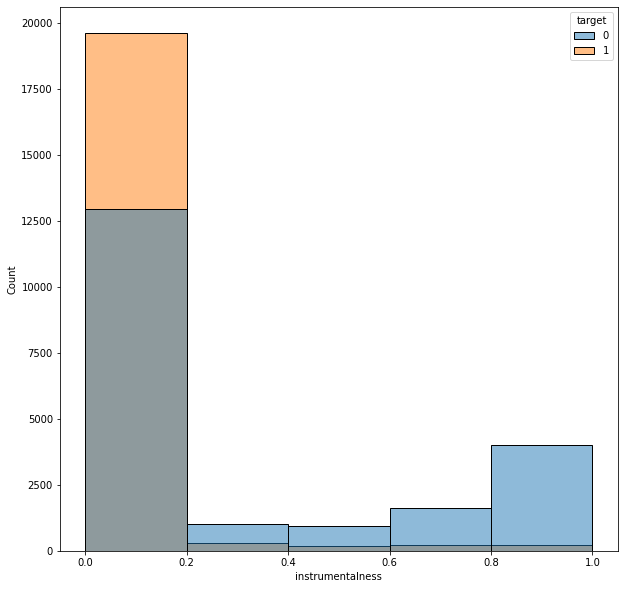

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='instrumentalness',hue='target', bins=5)   
plt.show()

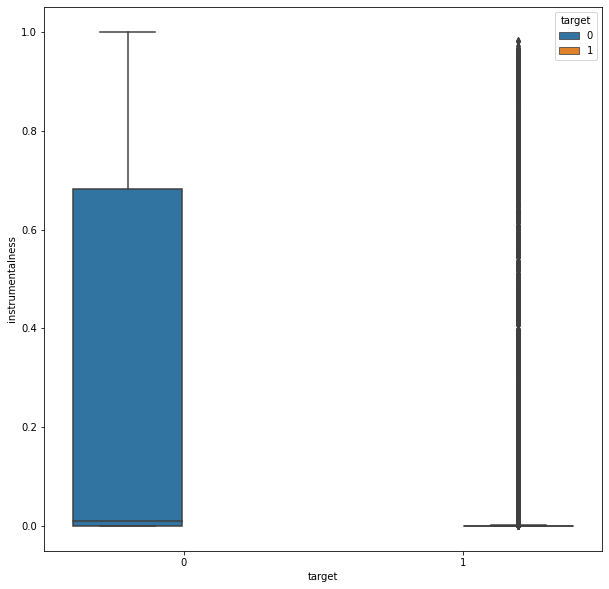

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='instrumentalness', data=allhl, hue='target')
plt.show()

As the valence (sentiment) of the song increases so do the chances of being a hit. Obviously not all happy songs will be hits but they are much more likely to be hits than sad songs. Very sad songs have a very high chance of not being a hit based on the visual.

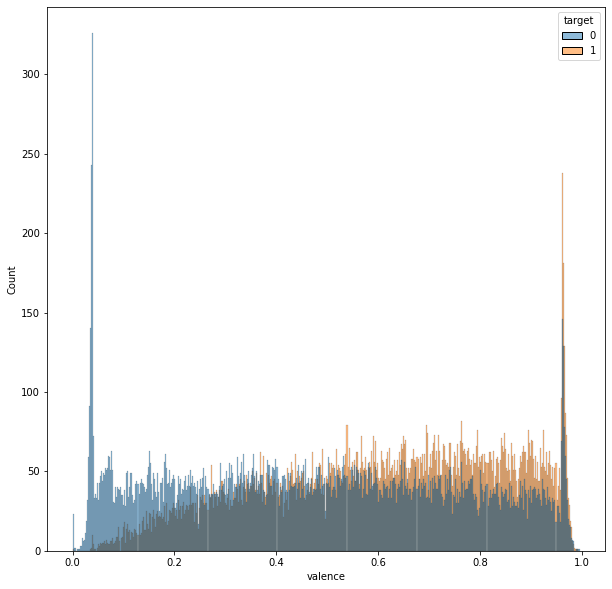

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='valence',hue='target', bins=500)
plt.show()

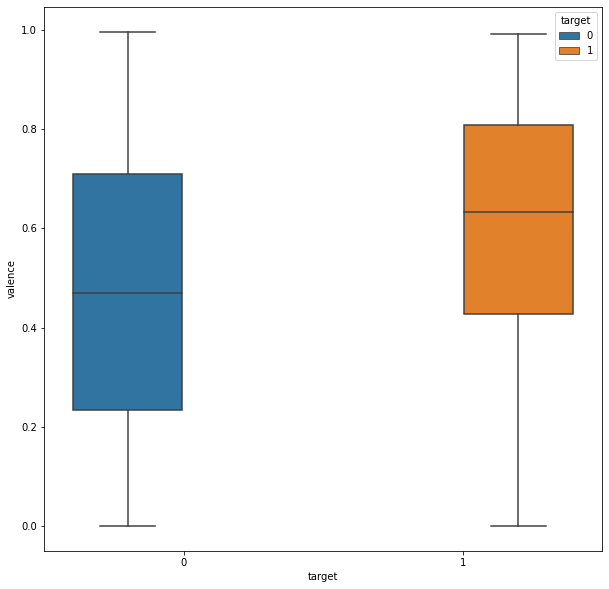

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='valence', data=allhl, hue='target')
plt.show()

There's a small window where tempo increases the likelihood of being a hit but it's a pretty sporatic window so overall tempo may not play a large role in whether a track will be a hit. 

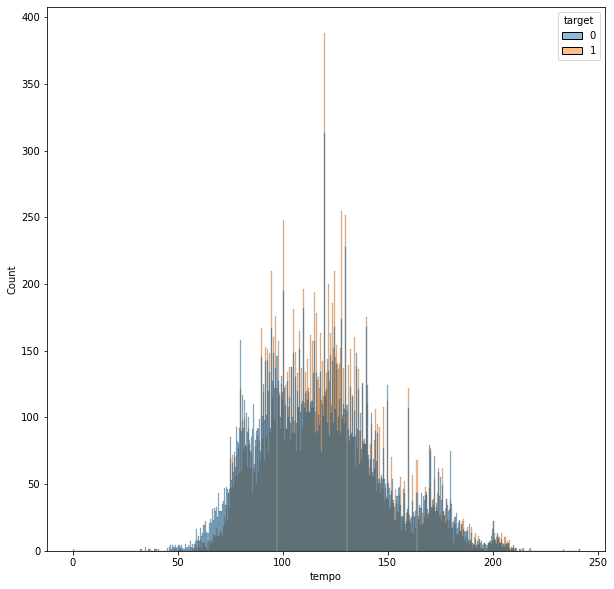

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='tempo',hue='target', bins=500)
plt.show()

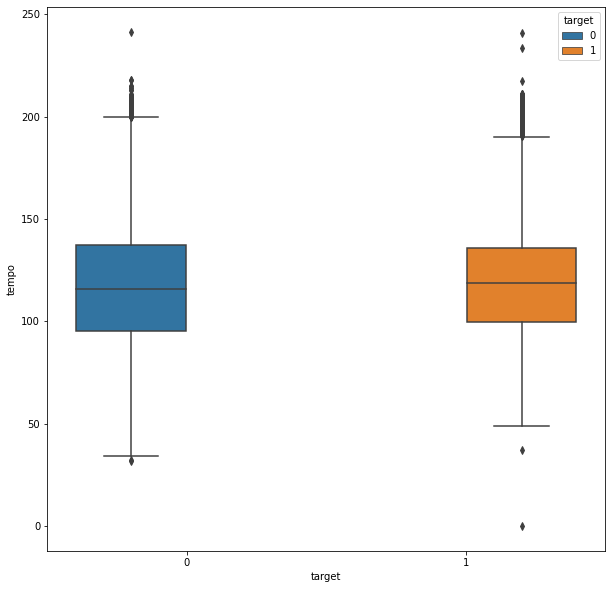

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='tempo', data=allhl, hue='target')
plt.show()

The length of a track heavily favors the slightly shorter tracks than the very long ones. 

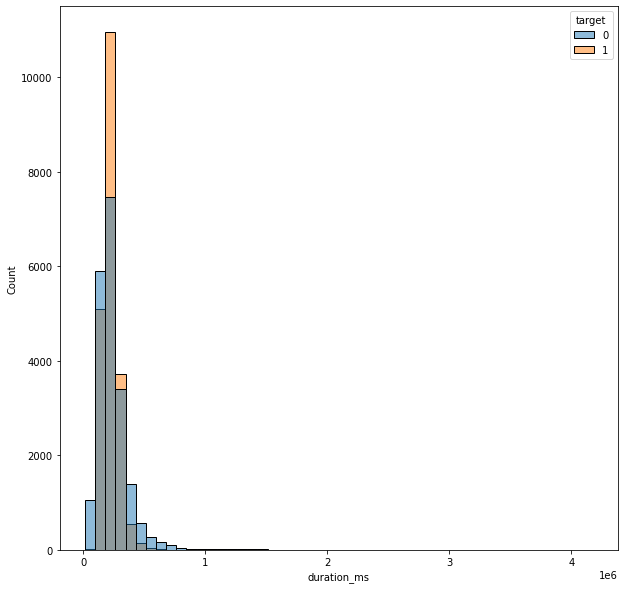

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=allhl,x='duration_ms',hue='target', bins=50)
plt.show()

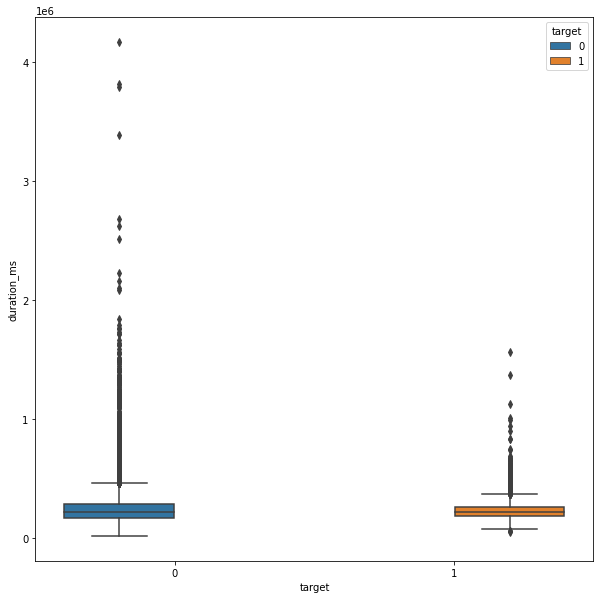

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target', y='duration_ms', data=allhl, hue='target')
plt.show()

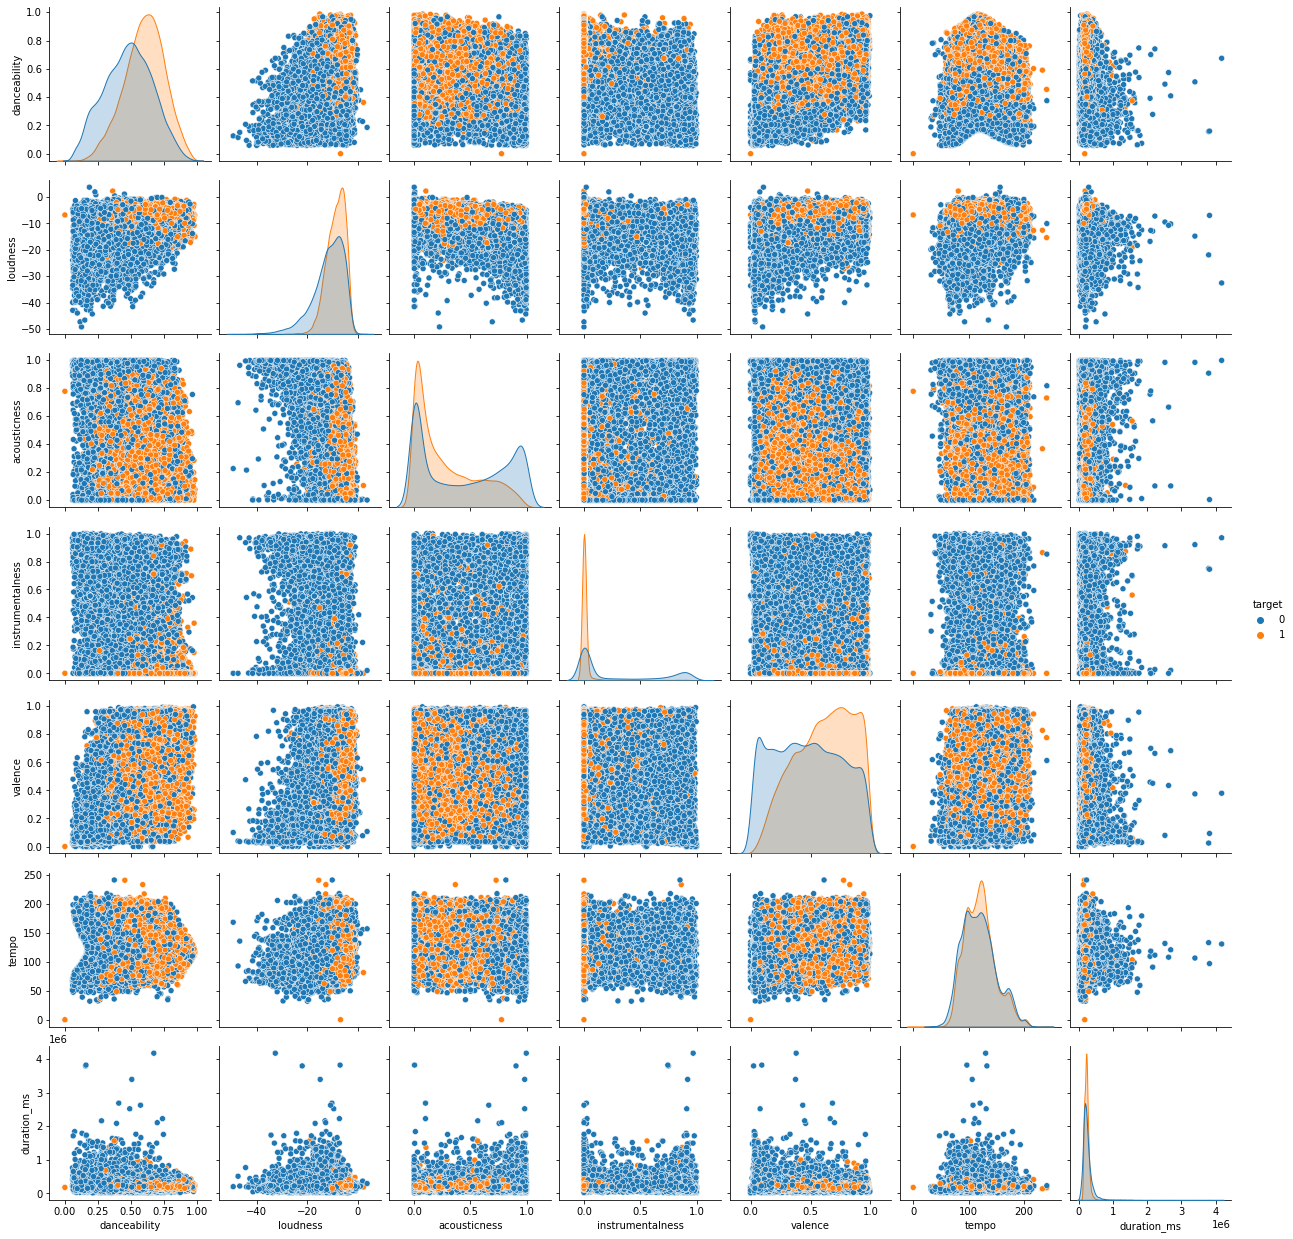

In [11]:
sns.pairplot(data=allhl[['danceability','loudness','acousticness','instrumentalness','valence','tempo','duration_ms','target']], hue='target')
plt.savefig('pairplot.png')
plt.show()

## Viewing Correlations of numerical features
-danceability has the highest positive correlation with the target value. Not surprising as Men Without Hats once stated
"We can dance if we want to. We can leave your friends behind. Cause your friends don't dance and if they don't dance. Well they're no friends of mine."
Getting people to move and groove makes sense as a potential predictor towards hit status. 
-instrumentalness has the highest negative correlation which makes sense as most hit songs tend to feature someone singing, rapping, or some kind of spoken word over the music. Although I personally find it best to listen to instrumental music while working/studying.
Instrumentalness will likely play the biggest factor in determining hit-status. 

In [ ]:
allhl[['danceability','loudness','acousticness','instrumentalness',
       'valence','tempo','duration_ms','target']].corr()

,danceability,loudness,acousticness,instrumentalness,valence,tempo,duration_ms,target
danceability,1.000000,0.274160,-0.261252,-0.301915,0.553858,-0.066541,-0.063030,0.346097
loudness,0.274160,1.000000,-0.566548,-0.374301,0.271775,0.169453,-0.049890,0.286034
acousticness,-0.261252,-0.566548,1.000000,0.204137,-0.195331,-0.179700,-0.070271,-0.246036
instrumentalness,-0.301915,-0.374301,0.204137,1.000000,-0.287047,-0.053618,0.106551,-0.407638
valence,0.553858,0.271775,-0.195331,-0.287047,1.000000,0.107901,-0.172166,0.251147
tempo,-0.066541,0.169453,-0.179700,-0.053618,0.107901,1.000000,-0.024318,0.032649
duration_ms,-0.063030,-0.049890,-0.070271,0.106551,-0.172166,-0.024318,1.000000,-0.073820
target,0.346097,0.286034,-0.246036,-0.407638,0.251147,0.032649,-0.073820,1.000000


## Heatmap of just the numerical columns

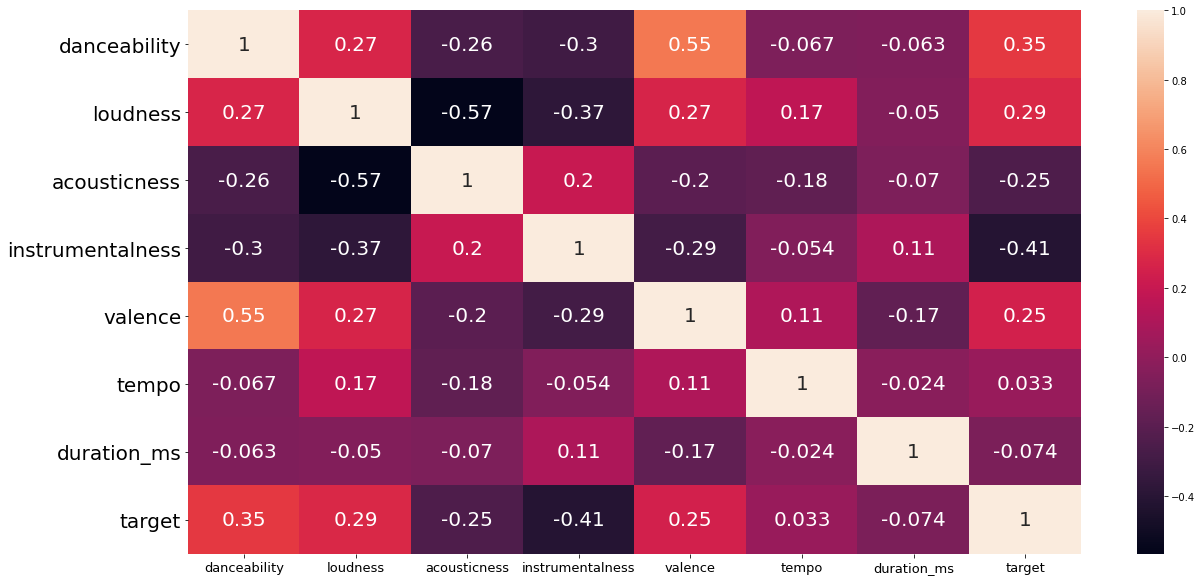

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(allhl[['danceability','loudness','acousticness','instrumentalness',
                   'valence','tempo','duration_ms','target']].corr(), 
                    annot=True, annot_kws={'size':20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.show()

# DATA PREP

##Getting dummies for the categorical features. 

In [21]:
allhl = pd.concat([allhl,pd.get_dummies(allhl['time_signature'], prefix='time_sig', drop_first=True)],axis=1)
allhl = pd.concat([allhl,pd.get_dummies(allhl['mode'], prefix='mode', drop_first=True)],axis=1)
allhl = pd.concat([allhl,pd.get_dummies(allhl['key'], prefix='key', drop_first=True)],axis=1)


In [22]:
allhl.drop(columns=['time_signature','mode','key'], inplace=True)

In [23]:
allhl.shape

(41106, 24)

In [24]:
allhl.head()

,danceability,loudness,acousticness,instrumentalness,valence,tempo,duration_ms,target,time_sig_1,time_sig_3,time_sig_4,time_sig_5,mode_1,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.417,-7.727,0.490,0.000000,0.845,185.655,173533,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0.498,-12.475,0.018,0.107000,0.797,101.801,213613,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.657,-13.392,0.846,0.000004,0.908,115.940,223960,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0.590,-12.058,0.706,0.024600,0.967,105.592,157907,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.515,-3.515,0.857,0.000872,0.906,114.617,245600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Processing the data

## Normalize data

In [ ]:
# Normalizing the data weakened the model performance. As such this step is commented out but can be revisited if desired. 
#allhl['duration_ms'] = normalize(allhl[['duration_ms']]) 
#allhl['liveness'] = normalize(allhl[['liveness']])
#allhl['instrumentalness'] = normalize(allhl[['instrumentalness']])

## Instantiate: Scaler 
(insert cool instantiation noise)


In [20]:
scaler = StandardScaler()


## Spliting the data

In [25]:
X = allhl.drop(columns='target')
y = allhl['target']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 24663
The number of observations in test set is 16443


# MODEL TESTING

## Logistic Regression

In [ ]:
lr = LR()

lr.fit(X_train, y_train)

lr_score = lr.score(X_train, y_train)
#lr_tscore = lr.score(X_test, y_test)

lr_predictions = lr.predict(X_train)

print('Train accuracy of Logistic Regression: {:.3f}'.format(lr_score))
#print('Test accuracy of Logistic Regression: {:.3f}'.format(lr_tscore))

Train accuracy of Logistic Regression: 0.719


In [ ]:
print(c_m(y_train,lr_predictions))
print(c_r(y_train,lr_predictions))

[[ 7685  4629]
 [ 2311 10038]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69     12314
           1       0.68      0.81      0.74     12349

    accuracy                           0.72     24663
   macro avg       0.73      0.72      0.72     24663
weighted avg       0.73      0.72      0.72     24663



In [ ]:
lr = LR(solver='liblinear', max_iter=100, class_weight='balanced')
params_lr = {'C': list(np.logspace(-4, 4, 9)),
          'max_iter': [100, 1000, 10000],
          #'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
          #'class_weight': ['balanced','None']
          }

gscv_lr = GSCV(lr, param_grid=params_lr, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_lr.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1996s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0],
                         'max_iter': [100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=10)

In [ ]:
pred_lr = gscv_lr.predict(X_train)
tpred_lr = gscv_lr.predict(X_test)

print(
    f'best solver: {gscv_lr.best_estimator_.solver}\n'
    f'best C: {gscv_lr.best_estimator_.C}\n'
    f'best max_iter: {gscv_lr.best_estimator_.max_iter}\n'
    f'best fit_intercept: {gscv_lr.best_estimator_.fit_intercept}\n'
    f'best class_weight: {gscv_lr.best_estimator_.class_weight}\n'
    f'best recall score: {gscv_lr.best_score_}\n'
    )

best solver: liblinear
best C: 0.001
best max_iter: 100
best fit_intercept: True
best class_weight: balanced
best recall score: 0.8214429287537939



In [ ]:
print(c_m(y_train,pred_lr))
print(c_r(y_train,pred_lr))

[[ 7521  4793]
 [ 2198 10151]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68     12314
           1       0.68      0.82      0.74     12349

    accuracy                           0.72     24663
   macro avg       0.73      0.72      0.71     24663
weighted avg       0.73      0.72      0.71     24663



## Support Vector 

In [ ]:
svm = LSVC(max_iter=10000, verbose=2)

svm.fit(X_train, y_train)

svm_score = svm.score(X_train, y_train)
#svm_tscore = svm.score(X_test, y_test)

svm_predictions = svm.predict(X_train)

print('Train accuracy of SVM: {:.3f}'.format(svm_score))
#print('Test accuracy of SVM: {:.3f}'.format(svm_tscore))

[LibLinear]Train accuracy of SVM: 0.717


In [ ]:
print(c_m(y_train,svm_predictions))
print(c_r(y_train,svm_predictions))

[[ 7482  4832]
 [ 2143 10206]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68     12314
           1       0.68      0.83      0.75     12349

    accuracy                           0.72     24663
   macro avg       0.73      0.72      0.71     24663
weighted avg       0.73      0.72      0.71     24663



In [ ]:
lsvc = LSVC(penalty='l2', class_weight='balanced')
params_svc = {#'penalty': ['l1','l2'],
              'C': list(np.logspace(-4, 0, 5)),
              'max_iter': [10, 25, 50],
              }

gscv_svc = GSCV(lsvc, param_grid=params_svc, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_svc.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0969s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=10)

In [ ]:
pred_svc = gscv_svc.predict(X_train)
tpred_svc = gscv_svc.predict(X_test)

print(
    f'best penalty: {gscv_svc.best_estimator_.penalty}\n'
    f'best C: {gscv_svc.best_estimator_.C}\n'
    f'best max_iter: {gscv_svc.best_estimator_.max_iter}\n'
    f'best fit_intercept: {gscv_svc.best_estimator_.fit_intercept}\n'
    f'best class_weight: {gscv_svc.best_estimator_.class_weight}\n'
    f'best recall score: {gscv_svc.best_score_}\n'
    )

best penalty: l2
best C: 0.0001
best max_iter: 10
best fit_intercept: True
best class_weight: balanced
best recall score: 0.8308365923688555



In [ ]:
print(c_m(y_train,pred_svc))
print(c_r(y_train,pred_svc))

[[ 7352  4962]
 [ 2084 10265]]
              precision    recall  f1-score   support

           0       0.78      0.60      0.68     12314
           1       0.67      0.83      0.74     12349

    accuracy                           0.71     24663
   macro avg       0.73      0.71      0.71     24663
weighted avg       0.73      0.71      0.71     24663



## KNearest Neighbors

In [ ]:
knn = KNC()

knn.fit(X_train, y_train)

knn_score = knn.score(X_train, y_train)
#knn_tscore = knn.score(X_test, y_test)

knn_predictions = knn.predict(X_train)

print('Train accuracy of KNN: {:.3f}'.format(knn_score))
#print('Test accuracy of KNN: {:.3f}'.format(knn_tscore))

Train accuracy of KNN: 0.806


In [ ]:
print(c_m(y_train,knn_predictions))
print(c_r(y_train,knn_predictions))

[[ 9087  3227]
 [ 1553 10796]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     12314
           1       0.77      0.87      0.82     12349

    accuracy                           0.81     24663
   macro avg       0.81      0.81      0.81     24663
weighted avg       0.81      0.81      0.81     24663



In [ ]:
knc = KNC()
params_knc = {'n_neighbors': [5, 10],
              'weights': ['uniform','distance'],
              #'algorithm': ['ball_tree','kd_tree','brute'],
              }

gscv_knc = GSCV(knc, param_grid=params_knc, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_knc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=10)

In [ ]:
pred_knc = gscv_knc.predict(X_train)
tpred_knc = gscv_knc.predict(X_test)

print(
    f'best n_neighbors: {gscv_knc.best_estimator_.n_neighbors}\n'
    f'best weights: {gscv_knc.best_estimator_.weights}\n'
    f'best algorithm: {gscv_knc.best_estimator_.algorithm}\n'
    f'best recall score: {gscv_knc.best_score_}\n'
    )

best n_neighbors: 10
best weights: distance
best algorithm: auto
best recall score: 0.8310791466000266



In [ ]:
print(c_m(y_train,pred_knc))
print(c_r(y_train,pred_knc))

[[12314     0]
 [   12 12337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12314
           1       1.00      1.00      1.00     12349

    accuracy                           1.00     24663
   macro avg       1.00      1.00      1.00     24663
weighted avg       1.00      1.00      1.00     24663



## Decision Tree

In [ ]:
dt = DTC(max_depth=10)

dt.fit(X_train,y_train)

dt_score = dt.score(X_train, y_train)
#dt_tscore = dt.score(X_test, y_test)

dt_predictions = dt.predict(X_train)
print('Train accuracy of Decision Tree: {:.3f} '.format(dt_score))
#print('Test accuracy of Decision Tree: {:.3f} '.format(dt_tscore))

Train accuracy of Decision Tree: 0.800 


In [ ]:
print(c_m(y_train,dt_predictions))
print(c_r(y_train,dt_predictions))

[[ 9000  3314]
 [ 1612 10737]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     12314
           1       0.76      0.87      0.81     12349

    accuracy                           0.80     24663
   macro avg       0.81      0.80      0.80     24663
weighted avg       0.81      0.80      0.80     24663



In [ ]:
dtc = DTC(criterion='gini',max_features='sqrt', class_weight='balanced')
params_dtc = {#'criterion': ['gini','entropy'],
              'max_depth': [2, 3, 4],
              'min_samples_split': [25, 100, 500],
              #'max_features': ['sqrt','log2','5','10'],
              #'class_weight': ['balanced','None']
              }

gscv_dtc = GSCV(dtc, param_grid=params_dtc, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0458s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1433s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [ ]:
pred_dtc = gscv_dtc.predict(X_train)
tpred_dtc = gscv_dtc.predict(X_test)

print(
    f'best criterion: {gscv_dtc.best_estimator_.criterion}\n'
    f'best max_depth: {gscv_dtc.best_estimator_.max_depth}\n'
    f'best min_samples_split: {gscv_dtc.best_estimator_.min_samples_split}\n'
    f'best max_features: {gscv_dtc.best_estimator_.max_features}\n'
    f'best class_weight: {gscv_dtc.best_estimator_.class_weight}\n'
    f'best recall score: {gscv_dtc.best_score_}\n'
    )

best criterion: gini
best max_depth: 2
best min_samples_split: 500
best max_features: sqrt
best class_weight: balanced
best recall score: 0.9221814139048904



In [ ]:
print(c_m(y_train,pred_dtc))
print(c_r(y_train,pred_dtc))

[[ 6076  6238]
 [ 2289 10060]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.59     12314
           1       0.62      0.81      0.70     12349

    accuracy                           0.65     24663
   macro avg       0.67      0.65      0.64     24663
weighted avg       0.67      0.65      0.65     24663



## Random Forest

In [ ]:
rf = RFC(max_depth=10)

rf.fit(X_train,y_train)

rf_score = rf.score(X_train, y_train)
#rf_tscore = rf.score(X_test, y_test)


rf_predictions = rf.predict(X_train)

print('Train accuracy of Random Forest: {:.3f}'.format(rf_score))
#print('Test accuracy of Random Forest: {:.3f}'.format(rf_tscore))

Train accuracy of Random Forest: 0.798


In [ ]:
print(c_m(y_train,rf_predictions))
print(c_r(y_train,rf_predictions))

[[ 8508  3806]
 [ 1183 11166]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     12314
           1       0.75      0.90      0.82     12349

    accuracy                           0.80     24663
   macro avg       0.81      0.80      0.80     24663
weighted avg       0.81      0.80      0.80     24663



In [ ]:
rfc = RFC(criterion='entropy', max_features='sqrt', class_weight='balanced')
params_rfc = {'n_estimators': [500, 1000],
              #'criterion': ['gini','entropy'],
              'max_depth': [8, 10, 12],
              'min_samples_split': [100, 500],
              #'max_features': ['sqrt','log2','5','10'],
              #'class_weight': ['balanced','None']
              }

gscv_rfc = GSCV(rfc, param_grid=params_rfc, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=Fal

In [ ]:
pred_rfc = gscv_rfc.predict(X_train)
tpred_rfc = gscv_rfc.predict(X_test)

print(
    f'best n_estimators: {gscv_rfc.best_estimator_.n_estimators}\n'
    f'best criterion: {gscv_rfc.best_estimator_.criterion}\n'
    f'best max_depth: {gscv_rfc.best_estimator_.max_depth}\n'
    f'best min_samples_split: {gscv_rfc.best_estimator_.min_samples_split}\n'
    f'best max_features: {gscv_rfc.best_estimator_.max_features}\n'
    f'best class_weight: {gscv_rfc.best_estimator_.class_weight}\n'
    f'best recall score: {gscv_rfc.best_score_}\n'
    )

best n_estimators: 500
best criterion: entropy
best max_depth: 8
best min_samples_split: 100
best max_features: sqrt
best class_weight: balanced
best recall score: 0.8659000103305277



In [ ]:
print(c_m(y_train,pred_rfc))
print(c_r(y_train,pred_rfc))

[[ 8161  4153]
 [ 1525 10824]]
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     12314
           1       0.72      0.88      0.79     12349

    accuracy                           0.77     24663
   macro avg       0.78      0.77      0.77     24663
weighted avg       0.78      0.77      0.77     24663



## Gradient Boost

In [ ]:
gbc = GBC()
gbc.fit(X_train, y_train)

gbc_score = gbc.score(X_train, y_train)
#gbc_tscore = gbc.score(X_test, y_test)

gbc_predictions = gbc.predict(X_train)
print('Train accuracy of Gradient Boost: {:.3f}'.format(gbc_score))
#print('Test accuracy of Gradient Boost: {:.3f}'.format(gbc_tscore))

Train accuracy of Gradient Boost: 0.776


In [ ]:
print(c_m(y_train,gbc_predictions))
print(c_r(y_train,gbc_predictions))

[[ 8495  3819]
 [ 1712 10637]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75     12314
           1       0.74      0.86      0.79     12349

    accuracy                           0.78     24663
   macro avg       0.78      0.78      0.77     24663
weighted avg       0.78      0.78      0.77     24663



In [ ]:
gbc = GBC()
params_gbc = {#'loss': ['deviance','exponential'],
              'learning_rate': list(np.logspace(-2, -1, 2)),
              'n_estimators': [100, 200],
              #'criterion': ['friedman_mse', 'mae'],
              #'max_depth': [1, 2, 3],
              'min_samples_split': [100, 200],
              #'max_features': ['sqrt','log2','10']
              }

gscv_gbc = GSCV(gbc, param_grid=params_gbc, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
pred_gbc = gscv_gbc.predict(X_train)
tpred_gbc = gscv_gbc.predict(X_test)

print(
    f'best loss: {gscv_gbc.best_estimator_.loss}\n'
    f'best learning_rate: {gscv_gbc.best_estimator_.learning_rate}\n'
    f'best n_estimators: {gscv_gbc.best_estimator_.n_estimators}\n'
    f'best criterion: {gscv_gbc.best_estimator_.criterion}\n'
    f'best max_depth: {gscv_gbc.best_estimator_.max_depth}\n'
    f'best min_samples_split: {gscv_gbc.best_estimator_.min_samples_split}\n'
    f'best max_features: {gscv_gbc.best_estimator_.max_features}\n'
    f'best recall score: {gscv_gbc.best_score_}\n'
    )

best loss: deviance
best learning_rate: 0.01
best n_estimators: 200
best criterion: friedman_mse
best max_depth: 3
best min_samples_split: 100
best max_features: None
best recall score: 0.8577210200002297



In [ ]:
print(c_m(y_train,pred_gbc))
print(c_r(y_train,pred_gbc))

[[ 8060  4254]
 [ 1713 10636]]
              precision    recall  f1-score   support

           0       0.82      0.65      0.73     12314
           1       0.71      0.86      0.78     12349

    accuracy                           0.76     24663
   macro avg       0.77      0.76      0.76     24663
weighted avg       0.77      0.76      0.76     24663



## XGBoost 

In [ ]:
xgb = XGB()
xgb.fit(X_train, y_train)

xgb_score = xgb.score(X_train, y_train)
#xgb_tscore = xgb.score(X_test, y_test)

xgb_predictions = xgb.predict(X_train)
print('Train accuracy of Gradient Boost: {:.3f}'.format(xgb_score))
#print('Test accuracy of Gradient Boost: {:.3f}'.format(xgb_tscore))

Train accuracy of Gradient Boost: 0.774


In [ ]:
print(c_m(y_train,xgb_predictions))
print(c_r(y_train,xgb_predictions))

[[ 8370  3944]
 [ 1638 10711]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75     12314
           1       0.73      0.87      0.79     12349

    accuracy                           0.77     24663
   macro avg       0.78      0.77      0.77     24663
weighted avg       0.78      0.77      0.77     24663



In [ ]:
xgb = XGB(booster='gbtree', subsample=.75)
params_xgb = {'eta': list(np.logspace(-2, 0, 3)),
              'max_depth': [3, 6, 10],
              }

gscv_xgb = GSCV(xgb, param_grid=params_xgb, scoring='recall', cv=5, n_jobs=-1, verbose=10)
gscv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.75, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.01, 0.1, 1.0], 'max_depth': [3, 6, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='re

In [ ]:
pred_xgb = gscv_xgb.predict(X_train)
tpred_xgb = gscv_xgb.predict(X_test)

print(
    f'best booster: {gscv_xgb.best_estimator_.booster}\n'
    f'best eta: {gscv_xgb.best_estimator_.learning_rate}\n'
    f'best max_depth: {gscv_xgb.best_estimator_.max_depth}\n'
    f'best recall score: {gscv_xgb.best_score_}\n'
    )

best booster: gbtree
best eta: 0.1
best max_depth: 3
best recall score: 0.8579634102547706



In [ ]:
print(c_m(y_train,pred_xgb))
print(c_r(y_train,pred_xgb))

[[ 8405  3909]
 [ 1646 10703]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75     12314
           1       0.73      0.87      0.79     12349

    accuracy                           0.77     24663
   macro avg       0.78      0.77      0.77     24663
weighted avg       0.78      0.77      0.77     24663



## Comparing results.

Two will be chosen for the model battle royale!! 

In [ ]:
# Based solely on best_score_ it would lead you to believe decision tree is the way to go... 

print('Logistic Regression:' , gscv_lr.best_score_)
print('Support Vector:', gscv_svc.best_score_)
print('KNearest Neighbor:', gscv_knc.best_score_)
print('Decision Tree:', gscv_dtc.best_score_)
print('Random Forest:', gscv_rfc.best_score_)
print('Gradient Boost:', gscv_gbc.best_score_)
print('XGBoost:', gscv_xgb.best_score_)

Logistic Regression: 0.8214429287537939
Support Vector: 0.8308365923688555
KNearest Neighbor: 0.8310791466000266
Decision Tree: 0.9221814139048904
Random Forest: 0.8659000103305277
Gradient Boost: 0.8577210200002297
XGBoost: 0.8579634102547706


In [ ]:
# The classification reports however tell a different story. Based on f1-score and accuracy it's a tie between Random Forest and XGBoost
print('Logistic Regression: \n' , c_r(y_test,tpred_lr))
print('Support Vector: \n', c_r(y_test,tpred_svc))
print('KNearest Neighbor: \n', c_r(y_test,tpred_knc))
print('Decision Tree: \n', c_r(y_test,tpred_dtc))
print('Random Forest: \n', c_r(y_test,tpred_rfc))
print('Gradient Boost: \n', c_r(y_test,tpred_gbc))
print('XGBoost: \n', c_r(y_test,tpred_xgb))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.77      0.62      0.69      8239
           1       0.68      0.81      0.74      8204

    accuracy                           0.71     16443
   macro avg       0.72      0.72      0.71     16443
weighted avg       0.72      0.71      0.71     16443

Support Vector: 
               precision    recall  f1-score   support

           0       0.77      0.61      0.68      8239
           1       0.67      0.82      0.74      8204

    accuracy                           0.71     16443
   macro avg       0.72      0.71      0.71     16443
weighted avg       0.72      0.71      0.71     16443

KNearest Neighbor: 
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      8239
           1       0.70      0.82      0.75      8204

    accuracy                           0.73     16443
   macro avg       0.74      0.73      0.73     16443
weighted avg

# BATTLE ROYALE FOR THE CROWN
Random Forest vs XGBoost

### Random Forest Round 2:

In [ ]:
rfc1 = RFC(criterion='entropy', class_weight='balanced')
params_rfc1 = {'n_estimators': [250, 300, 400],
              #'criterion': ['gini','entropy'],
              'max_depth': [8, 9, 10],
              'min_samples_split': [50, 75],
              #'max_features': ['sqrt','log2','5','10'],
              #'class_weight': ['balanced','None']
              }

gscv_rfc1 = GSCV(rfc1, param_grid=params_rfc1, scoring='f1', cv=5, n_jobs=-1, verbose=10)
gscv_rfc1.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=Fal

In [ ]:
pred_rfc1 = gscv_rfc1.predict(X_train)
tpred_rfc1 = gscv_rfc1.predict(X_test)

print(
    f'best n_estimators: {gscv_rfc1.best_estimator_.n_estimators}\n'
    #f'best criterion: {gscv_rfc1.best_estimator_.criterion}\n'
    f'best max_depth: {gscv_rfc1.best_estimator_.max_depth}\n'
    f'best min_samples_split: {gscv_rfc1.best_estimator_.min_samples_split}\n'
    f'best max_features: {gscv_rfc1.best_estimator_.max_features}\n'
    #f'best class_weight: {gscv_rfc1.best_estimator_.class_weight}\n'
    f'best f1 score: {gscv_rfc1.best_score_}\n'
    )

best n_estimators: 400
best max_depth: 10
best min_samples_split: 50
best max_features: auto
best f1 score: 0.7863240693344501



In [ ]:
print(c_m(y_train,pred_rfc1))
print(c_r(y_train,pred_rfc1))

[[ 8323  3991]
 [ 1385 10964]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76     12314
           1       0.73      0.89      0.80     12349

    accuracy                           0.78     24663
   macro avg       0.80      0.78      0.78     24663
weighted avg       0.80      0.78      0.78     24663



### XGBoost Round 2:

In [ ]:
xgb1 = XGB(booster='gbtree')
params_xgb1 = {'gamma': [10 , 100],
              'learning_rate': [.5, .1],
              'max_depth': [3, 4, 5],
              }

gscv_xgb1 = GSCV(xgb1, param_grid=params_xgb1, scoring='f1', cv=5, n_jobs=-1, verbose=10)
gscv_xgb1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [10, 100], 'learning_rate': [0.5, 0.1],
                         'max_depth': [3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [ ]:
pred_xgb1 = gscv_xgb1.predict(X_train)
tpred_xgb1 = gscv_xgb1.predict(X_test)

print(
    f'best booster: {gscv_xgb1.best_estimator_.booster}\n'
    f'best eta: {gscv_xgb1.best_estimator_.learning_rate}\n'
    #f'best n_estimators: {gscv_gbc.best_estimator_.n_estimators}\n'
    #f'best criterion: {gscv_gbc.best_estimator_.criterion}\n'
    f'best max_depth: {gscv_xgb1.best_estimator_.max_depth}\n'
    #f'best min_samples_split: {gscv_gbc.best_estimator_.min_samples_split}\n'
    #f'best max_features: {gscv_gbc.best_estimator_.max_features}\n'
    f'best f1 score: {gscv_xgb1.best_score_}\n'
    )

best booster: gbtree
best eta: 0.1
best max_depth: 5
best f1 score: 0.78678207251851



In [ ]:
print(c_m(y_train,pred_xgb1))
print(c_r(y_train,pred_xgb1))

[[ 8463  3851]
 [ 1594 10755]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76     12314
           1       0.74      0.87      0.80     12349

    accuracy                           0.78     24663
   macro avg       0.79      0.78      0.78     24663
weighted avg       0.79      0.78      0.78     24663



## Round 2 Classification Reports 

In [ ]:
print('Random Forest: \n', c_r(y_train,pred_rfc1))
print('XGBoost: \n', c_r(y_train,pred_xgb1))


Random Forest: 
               precision    recall  f1-score   support

           0       0.86      0.68      0.76     12314
           1       0.73      0.89      0.80     12349

    accuracy                           0.78     24663
   macro avg       0.80      0.78      0.78     24663
weighted avg       0.80      0.78      0.78     24663

XGBoost: 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76     12314
           1       0.74      0.87      0.80     12349

    accuracy                           0.78     24663
   macro avg       0.79      0.78      0.78     24663
weighted avg       0.79      0.78      0.78     24663



# WINNER
XGBoost

Let's really dig in and see what this can do...

In [64]:
xgb3 = XGB(booster='gbtree', eta=.1, max_depth=5)
params_xgb3 = {#'gamma': [6, 7, 8],
               'reg_lambda': [.01, .1],
               #'reg_alpha': [.04, .06,]
              }

gscv_xgb3 = GSCV(xgb3, param_grid=params_xgb3, scoring='accuracy', cv=10, n_jobs=-1, verbose=10)
gscv_xgb3.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eta=0.1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_lambda': [0.01, 0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose

In [65]:
pred_xgb3 = gscv_xgb3.predict(X_train)
tpred_xgb3 = gscv_xgb3.predict(X_test)

print(
    #f'best loss: {gscv_xgb.best_estimator_.loss}\n'
    f'best eta: {gscv_xgb3.best_estimator_.learning_rate}\n'
    f'best gamma: {gscv_xgb3.best_estimator_.gamma}\n'
    f'best lambda: {gscv_xgb3.best_estimator_.reg_lambda}\n'
    f'best alpha: {gscv_xgb3.best_estimator_.reg_alpha}\n'
    #f'best min_samples_split: {gscv_gbc.best_estimator_.min_samples_split}\n'
    #f'best max_features: {gscv_gbc.best_estimator_.max_features}\n'
    f'best f1 score: {gscv_xgb3.best_score_}\n'
    )

best eta: 0.1
best gamma: 0
best lambda: 0.01
best alpha: 0
best f1 score: 0.7703039570834612



In [66]:
print(c_m(y_train,pred_xgb3))
print(c_r(y_train,pred_xgb3))

[[ 8795  3545]
 [ 1489 10834]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78     12340
           1       0.75      0.88      0.81     12323

    accuracy                           0.80     24663
   macro avg       0.80      0.80      0.79     24663
weighted avg       0.80      0.80      0.79     24663



In [67]:
print('XGBoost: \n', c_r(y_test,tpred_xgb3))

XGBoost: 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75      8213
           1       0.74      0.85      0.79      8230

    accuracy                           0.77     16443
   macro avg       0.78      0.77      0.77     16443
weighted avg       0.78      0.77      0.77     16443



In [68]:
cols = allhl.drop(columns='target').columns 
pd.DataFrame({'columns':cols, 'importance scores':gscv_xgb3.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
3,instrumentalness,0.301482
2,acousticness,0.098776
0,danceability,0.090636
11,mode_1,0.061465
9,time_sig_4,0.057658
6,duration_ms,0.055210
1,loudness,0.037337
4,valence,0.033125
8,time_sig_3,0.031146
7,time_sig_1,0.029792


In [ ]:
# answer below:
y_pred = gscv_xgb3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

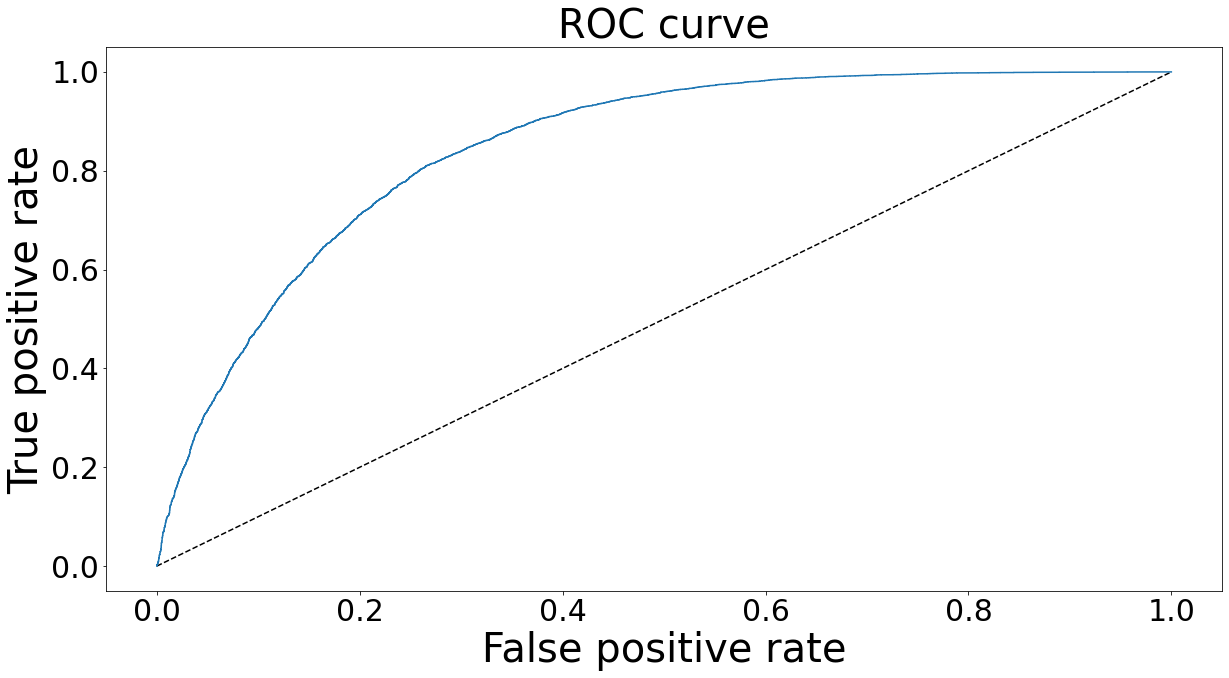

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve', fontdict={'fontsize':40})
plt.xlabel('False positive rate',fontdict={'fontsize':40})
plt.ylabel('True positive rate',fontdict={'fontsize':40})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()